## Regression Model for Real Estate Analysis

##### importing Libraries

In [715]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [716]:
df=pd.read_csv('train.csv')#,keep_default_na=False

In [717]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [718]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [719]:
df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

#### Data Analysis

In [720]:
df.describe(percentiles=[.1, .25, .5, .75, .80, .90, 1])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
10%,146.900000,20.000000,44.000000,5000.000000,5.000000,5.000000,1924.900000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2006.000000,106475.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
80%,1168.200000,80.000000,85.000000,12205.800000,7.000000,7.000000,2003.000000,2005.000000,206.000000,806.400000,...,192.000000,83.200000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,230000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000


In [721]:
df.columns[df.isna().sum()!=0]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [722]:
df[df.columns[df.isna().sum()!=0]].isna().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [723]:
df.shape

(1460, 81)

### Drop columns that have Majority values filled with NA

In [724]:
df_dropped = df.drop(["Alley","PoolQC","Fence","MiscFeature"], axis='columns')

In [725]:
df_dropped[df_dropped.columns[df_dropped.isna().sum()!=0]].isna().sum()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [726]:
na_columns=df_dropped.columns[df_dropped.isna().sum()!=0]

In [727]:
df_dropped[na_columns].head()

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA
1,80.0,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA
3,60.0,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA


In [728]:
df['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

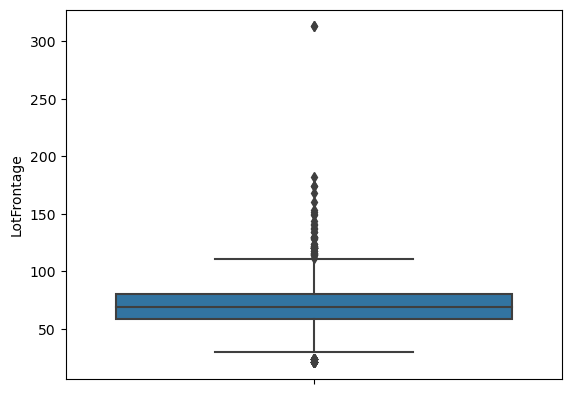

In [729]:
def box_plot(df,columns):
    for column in columns:
        sns.boxplot(y = column, data = df)
        
box_plot(df_dropped, ['LotFrontage'])


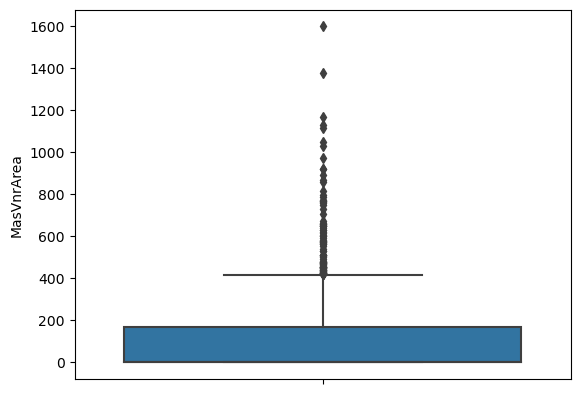

In [730]:
box_plot(df_dropped, ['MasVnrArea'])

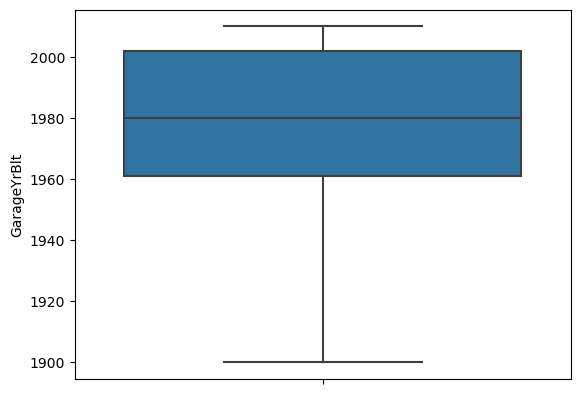

In [731]:
box_plot(df_dropped, ['GarageYrBlt'])

##### Using domain konwledge and based on LotFrontage, MasVnrArea, GarageYrBlt I do not see any outliers in the missing data. We can use 

In [732]:
df_dropped[na_columns].head()

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA
1,80.0,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA
3,60.0,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA


In [733]:
df_dropped = df_dropped.drop(["Id"], axis='columns')

In [734]:
integer_columns = df_dropped.select_dtypes(include=['int64']).columns 
float_columns = df_dropped.select_dtypes(include=['float64']).columns 
object_columns = df_dropped.select_dtypes(include=['object']).columns

In [735]:
integer_columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [736]:
float_columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [737]:
object_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [738]:
import matplotlib.pyplot as plt
import seaborn as sns

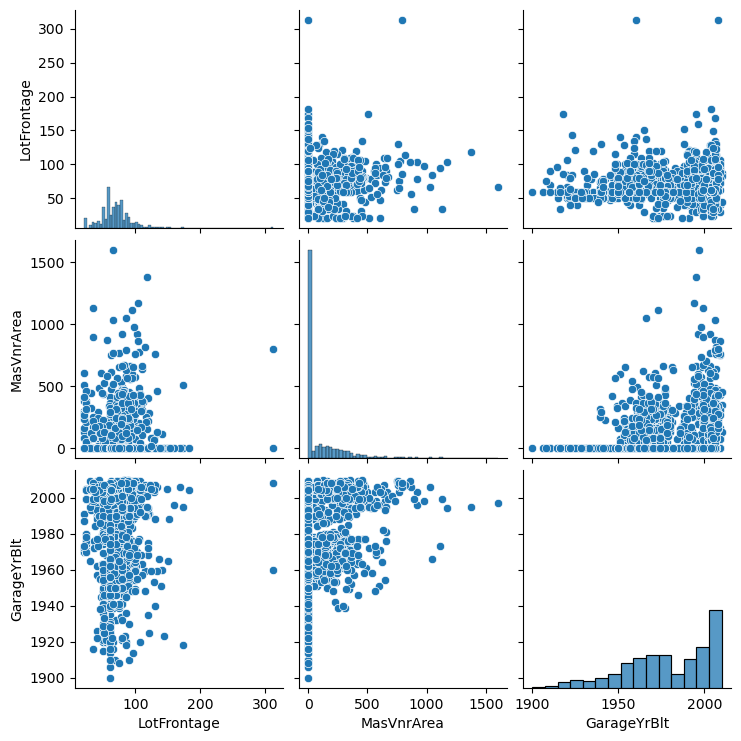

In [739]:
sns.pairplot(df_dropped[float_columns])


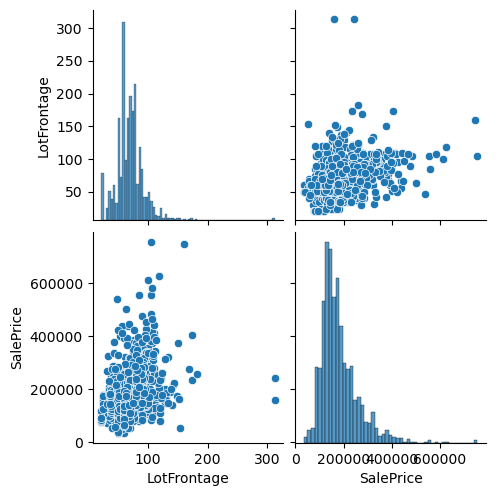

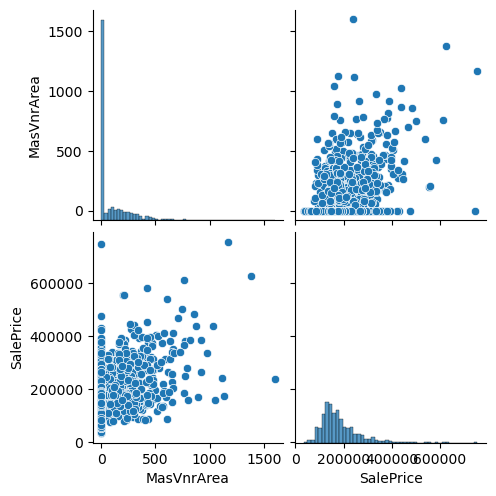

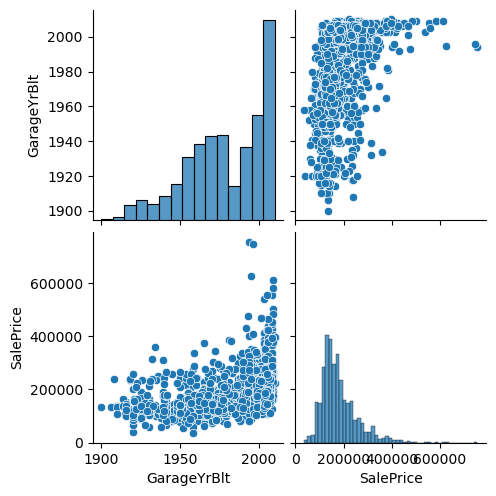

In [740]:
def pair_plots(df,columns,sale_column):
    for column in columns:
        sns.pairplot(df[[column,sale_column]])
pair_plots(df_dropped,float_columns,'SalePrice')        

In [741]:
df_dropped[df_dropped.columns[df_dropped.isna().sum()!=0]].isna().sum()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

#### Data Cleaning

In [742]:
##### From the data Dictionary GarageYrBlt
df_dropped['LotFrontage'].fillna(value=df_dropped['LotFrontage'].mean(), inplace=True)
df_dropped['MasVnrArea'].fillna(value=df_dropped['MasVnrArea'].mean(), inplace=True)
df_dropped['GarageYrBlt'].fillna(value=0, inplace=True)
#####Object Type MasVnrType BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 FireplaceQu GarageType GarageFinish GarageQual GarageCond
df_dropped['MasVnrType'] = df_dropped['MasVnrType'].fillna('None')
df_dropped['BsmtQual'] = df_dropped['BsmtQual'].fillna('None')
df_dropped['BsmtCond'] = df_dropped['BsmtCond'].fillna('None')
df_dropped['BsmtExposure'] = df_dropped['BsmtExposure'].fillna('None')
df_dropped['BsmtFinType1'] = df_dropped['BsmtFinType1'].fillna('None')
df_dropped['BsmtFinType2'] = df_dropped['BsmtFinType2'].fillna('None')
df_dropped['FireplaceQu'] = df_dropped['FireplaceQu'].fillna('None')
df_dropped['GarageType'] = df_dropped['GarageType'].fillna('None')
df_dropped['GarageFinish'] = df_dropped['GarageFinish'].fillna('None')
df_dropped['GarageQual'] = df_dropped['GarageQual'].fillna('None')
df_dropped['GarageCond'] = df_dropped['GarageCond'].fillna('None')
#######
df_dropped['Electrical'] =df_dropped['Electrical'].fillna('SBrkr')

In [743]:
df_dropped[df_dropped.columns[df_dropped.isna().sum()!=0]].isna().sum()

Series([], dtype: float64)

In [744]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [745]:
integer_columns = df_dropped.select_dtypes(include=['int64']).columns 
float_columns = df_dropped.select_dtypes(include=['float64']).columns 
object_columns = df_dropped.select_dtypes(include=['object']).columns

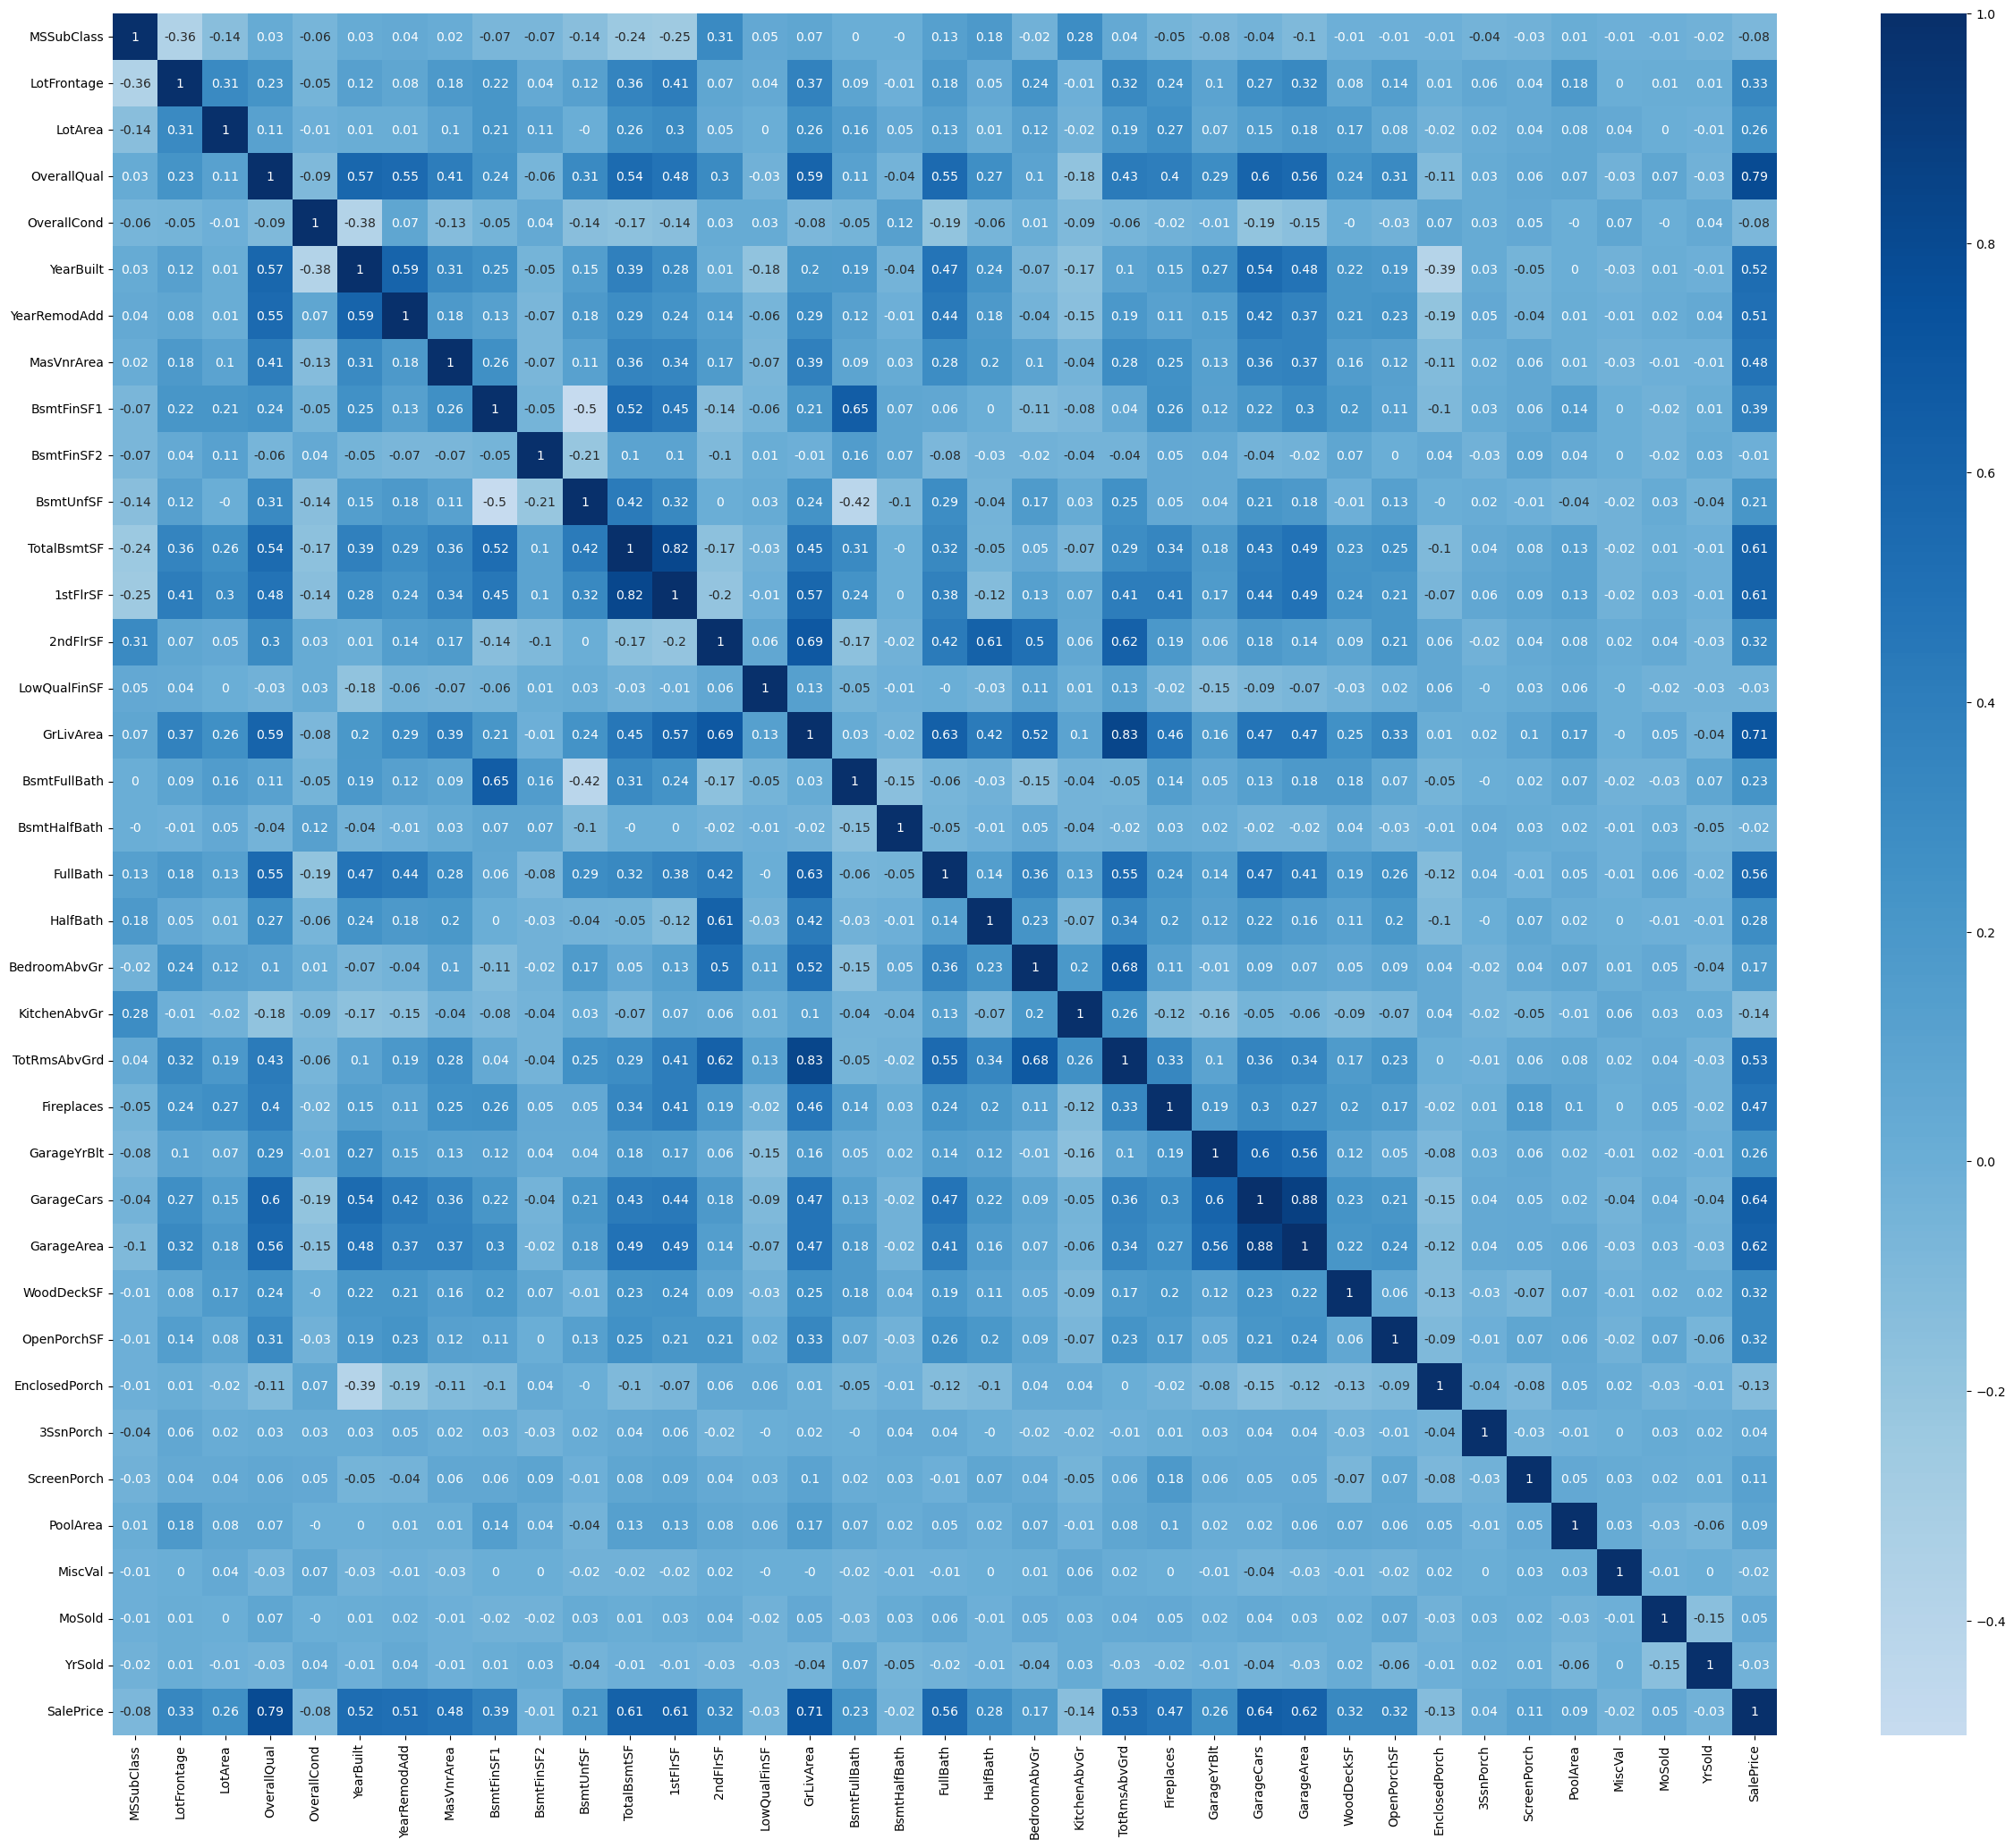

In [746]:
# plotting correlation using heatmap
plt.subplots(figsize = (30,25))
sns.heatmap(round(df_dropped.corr(),2), cmap='Blues' , annot=True, center = 0)
plt.show()

#### Data Preparation using scaling and dummy variables

In [747]:
categorical_values=df_dropped[object_columns]
categorical_values.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,None,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [748]:
categorical_dummies=pd.get_dummies(categorical_values,drop_first=True)
categorical_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [749]:
Y=df_dropped['SalePrice']

In [750]:
df_dropped.drop(object_columns, axis=1,inplace=True)


In [751]:
df_dropped.drop(['SalePrice'], axis=1,inplace=True)

In [752]:
df_dropped.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [753]:
Y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

<Axes: xlabel='SalePrice', ylabel='Density'>

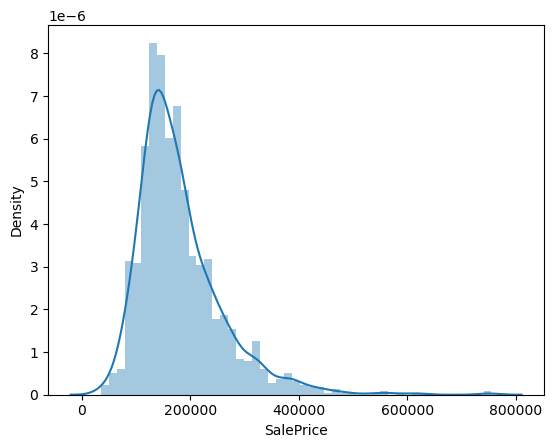

In [754]:
sns.distplot(Y)

In [755]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [756]:
x_columns=integer_columns.drop(['SalePrice'])####remove response variable

In [757]:
df_dropped[x_columns]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,706,0,150,856,...,548,0,61,0,0,0,0,0,2,2008
1,20,9600,6,8,1976,1976,978,0,284,1262,...,460,298,0,0,0,0,0,0,5,2007
2,60,11250,7,5,2001,2002,486,0,434,920,...,608,0,42,0,0,0,0,0,9,2008
3,70,9550,7,5,1915,1970,216,0,540,756,...,642,0,35,272,0,0,0,0,2,2006
4,60,14260,8,5,2000,2000,655,0,490,1145,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,460,0,40,0,0,0,0,0,8,2007
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,500,349,0,0,0,0,0,0,2,2010
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,240,366,0,112,0,0,0,0,4,2010


In [758]:
df_integer = pd.DataFrame(scaler.fit_transform(df_dropped[x_columns].values), columns=x_columns, index=df_dropped.index)

In [759]:
df_float = pd.DataFrame(scaler.fit_transform(df_dropped[float_columns].values), columns=float_columns, index=df_dropped.index)

In [760]:
X_Updated=pd.concat([df_integer, df_float,categorical_dummies], axis=1)

In [761]:
X_Updated.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.033420,0.666667,0.500,0.949275,0.883333,0.125089,0.0,0.064212,0.140098,...,0,0,0,0,1,0,0,0,1,0
1,0.000000,0.038795,0.555556,0.875,0.753623,0.433333,0.173281,0.0,0.121575,0.206547,...,0,0,0,0,1,0,0,0,1,0
2,0.235294,0.046507,0.666667,0.500,0.934783,0.866667,0.086109,0.0,0.185788,0.150573,...,0,0,0,0,1,0,0,0,1,0
3,0.294118,0.038561,0.666667,0.500,0.311594,0.333333,0.038271,0.0,0.231164,0.123732,...,0,0,0,0,1,0,0,0,0,0
4,0.235294,0.060576,0.777778,0.500,0.927536,0.833333,0.116052,0.0,0.209760,0.187398,...,0,0,0,0,1,0,0,0,1,0


#### Splitting Data Set


In [762]:
X_Updated['constant']=1

In [763]:
X_Updated.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,constant
0,0.235294,0.033420,0.666667,0.500,0.949275,0.883333,0.125089,0.0,0.064212,0.140098,...,0,0,0,1,0,0,0,1,0,1
1,0.000000,0.038795,0.555556,0.875,0.753623,0.433333,0.173281,0.0,0.121575,0.206547,...,0,0,0,1,0,0,0,1,0,1
2,0.235294,0.046507,0.666667,0.500,0.934783,0.866667,0.086109,0.0,0.185788,0.150573,...,0,0,0,1,0,0,0,1,0,1
3,0.294118,0.038561,0.666667,0.500,0.311594,0.333333,0.038271,0.0,0.231164,0.123732,...,0,0,0,1,0,0,0,0,0,1
4,0.235294,0.060576,0.777778,0.500,0.927536,0.833333,0.116052,0.0,0.209760,0.187398,...,0,0,0,1,0,0,0,1,0,1


##### Simple Linear Regression using all attributes

In [764]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(X_Updated, Y, 
                                                    train_size=0.75,
                                                    test_size = 0.25, random_state=42)

In [765]:
from sklearn.linear_model import LinearRegression
Linear_reg_model = LinearRegression()

In [766]:
Linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [767]:
print(Linear_reg_model.intercept_)

-654951.7132420092


In [768]:
print(Linear_reg_model.coef_)

[ 1.34120468e+04  1.42348825e+05  6.27204464e+04  4.37931938e+04
  4.83148714e+04  7.13019798e+03  5.66621634e+16  1.47980207e+16
  2.34519514e+16 -6.13405064e+16 -3.51233755e+16 -1.66429028e+16
 -4.61004378e+15  4.27799168e+16  5.27450000e+03 -2.86475000e+03
  1.04607500e+04  2.18400000e+03 -2.11317500e+04 -5.15750000e+04
  1.69280000e+04  1.78990000e+04  4.90087500e+03  4.42740000e+04
  1.37360000e+04 -8.17500000e+02  1.54787500e+03  2.67526875e+04
  1.15107500e+04  5.99095000e+04 -2.61002188e+04 -4.69050000e+03
 -7.09500000e+02  1.21388750e+04  3.03370000e+04 -7.67095000e+04
  3.09220000e+04  1.58200000e+04  1.95140000e+04  2.09465000e+04
  2.46815000e+04  7.07650000e+03  5.53850000e+03  1.63400000e+03
  1.46955000e+04 -8.52300000e+03  4.43250000e+03 -2.53602500e+04
  1.08510000e+04 -7.04700000e+03 -2.20298750e+04 -4.32000000e+02
  4.94875000e+03 -4.52566875e+04 -1.42682500e+04 -1.08025000e+04
 -1.41940000e+04 -1.62502500e+04 -1.52560000e+04  1.81350000e+03
 -2.65600000e+04 -1.51405

In [769]:
y_pred_train = Linear_reg_model.predict(X_train)
y_pred_test = Linear_reg_model.predict(X_test)

In [770]:
from sklearn.metrics import r2_score
r2_train_lr = r2_score(y_train, y_pred_train)

In [771]:
r2_test_lr = r2_score(y_test, y_pred_test)

In [772]:
print(r2_train_lr)
print(r2_test_lr)

0.93387688861025
-1.1746980895814684e+20


#### Residual Analysis

Text(0.5, 0, 'Errors')

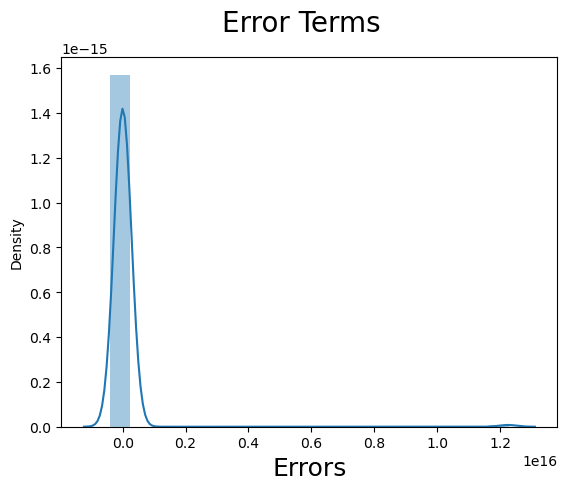

In [773]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred_test), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

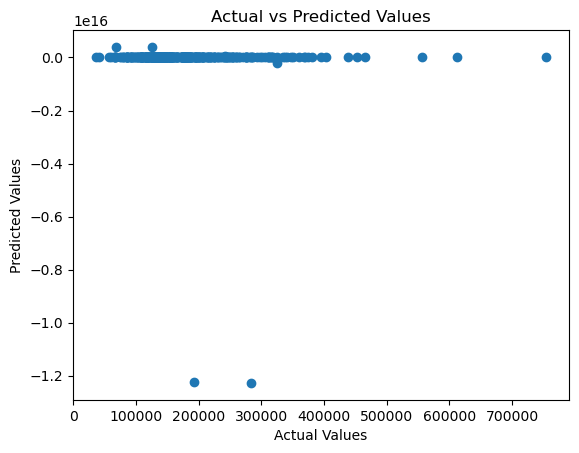

In [774]:

# Create scatter plot with actual and predicted values
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

### Ridge and Lasso Regression

In [775]:
# list of alphas to tune
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [776]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 7.0}
-19345.684209951178


In [777]:
alpha = 7.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-1.89408104e+04,  1.61252647e+04,  5.40610254e+04,  2.18833224e+04,
        6.88101162e+03,  1.15115530e+04,  1.24389929e+04,  4.92687700e+03,
        1.15721432e+04,  1.71031783e+04,  3.06829819e+04,  4.40304187e+04,
        7.80112944e+03,  4.31615478e+04,  1.86189985e+04, -3.42903104e+03,
        2.92655211e+04,  1.17812972e+04,  9.12612565e+03, -1.02008323e+04,
        3.70219116e+04,  1.88172389e+04,  3.32178455e+04,  1.97777946e+04,
        1.62818809e+04, -3.24945079e+02,  1.76729166e+03,  1.05111558e+04,
        1.38940468e+04,  9.34631369e+03, -1.16589936e+03, -4.81088435e+02,
       -1.86990403e+03, -4.35965454e+03,  1.45949173e+04, -5.46159050e+02,
        6.39044234e+03,  6.92335538e+02,  3.73432727e+03, -7.67584991e+02,
        3.09291187e+03,  1.27750365e+04, -1.19580163e+04, -4.23391531e+02,
        1.95922963e+04,  7.09961068e+03,  1.14305685e+04, -4.70640253e+03,
        1.30455898e+04, -8.03232519e+03, -4.64900484e+03, -1.17916199e+03,
        6.23635812e+03,  

In [778]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [779]:
r2_train_ridge = r2_score(y_train, y_pred_train)
r2_test_ridge = r2_score(y_test, y_pred_test)

#### Residual Analysis

Text(0.5, 0, 'Errors')

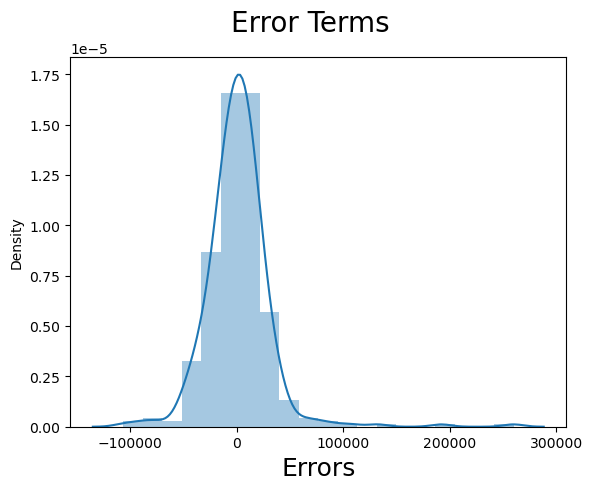

In [780]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred_test), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

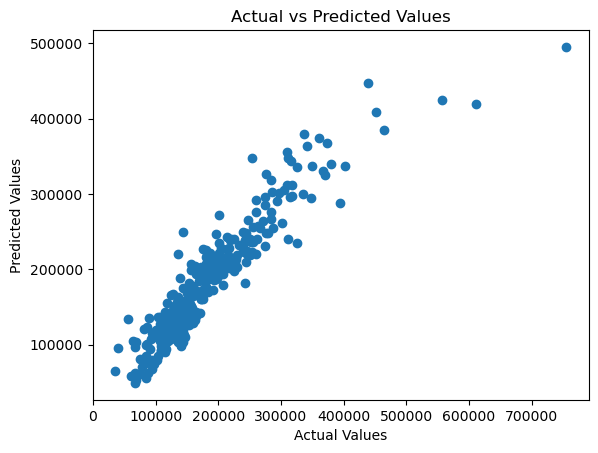

In [781]:
# Create scatter plot with actual and predicted values
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [782]:
print(r2_train_ridge)
print(r2_test_ridge)

0.8880161712419682
0.8649059793350234


In [783]:
predictors = X_train.columns
coef = pd.Series(ridge.coef_,predictors).sort_values()

In [784]:
coef.tail(10)

RoofMatl_WdShngl        24429.421442
FullBath                29265.521129
1stFlrSF                30682.981901
GarageCars              33217.845522
Neighborhood_StoneBr    34587.388891
Neighborhood_NoRidge    35810.088060
TotRmsAbvGrd            37021.911552
GrLivArea               43161.547813
2ndFlrSF                44030.418706
OverallQual             54061.025379
dtype: float64

In [785]:
alpha = 14.0
ridge_two = Ridge(alpha=alpha)
ridge_two.fit(X_train, y_train)
ridge_two.coef_

array([-1.77089343e+04,  1.11461364e+04,  4.44762503e+04,  1.64684873e+04,
        5.66622432e+03,  1.30399339e+04,  1.09593589e+04,  3.30658813e+03,
        1.16103830e+04,  1.53601288e+04,  2.48753473e+04,  3.46680512e+04,
        5.89175782e+03,  3.45452853e+04,  1.59950178e+04, -3.30572858e+03,
        2.68767424e+04,  1.20615047e+04,  1.02188891e+04, -5.83214323e+03,
        3.26452779e+04,  1.64284205e+04,  2.94632457e+04,  2.10263822e+04,
        1.50390546e+04,  2.10773052e+03,  7.35119549e+02,  6.19311932e+03,
        1.18544692e+04,  6.92144648e+03, -6.48174128e+02, -1.50275252e+02,
       -1.77675956e+03,  2.40007825e+02,  1.34258480e+04,  5.12961251e+02,
        3.95276983e+03,  9.11232041e+02,  4.11294834e+03, -2.93889157e+03,
        2.00422672e+03,  1.19097745e+04, -8.05699224e+03, -1.11398934e+03,
        1.50821805e+04,  4.41202586e+03,  8.07058953e+03, -2.62623339e+03,
        1.26133105e+04, -6.82248715e+03, -2.59672682e+03, -1.24588565e+03,
        5.52526530e+03,  

In [786]:
y_pred_train = ridge_two.predict(X_train)
y_pred_test = ridge_two.predict(X_test)

In [787]:
r2_train_ridge_two = r2_score(y_train, y_pred_train)
r2_test_ridge_two = r2_score(y_test, y_pred_test)

#### Residual Analysis

Text(0.5, 0, 'Errors')

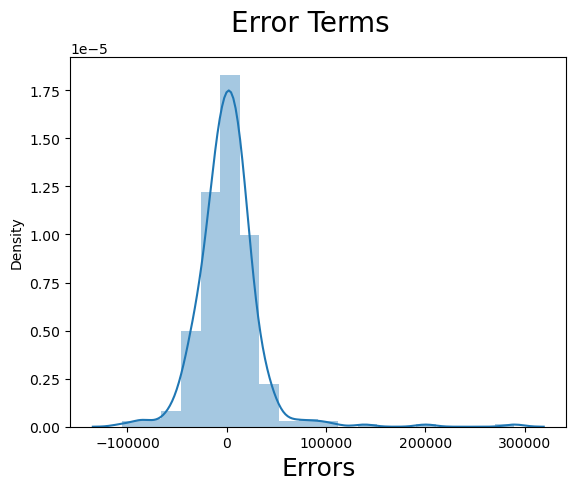

In [788]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred_test), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

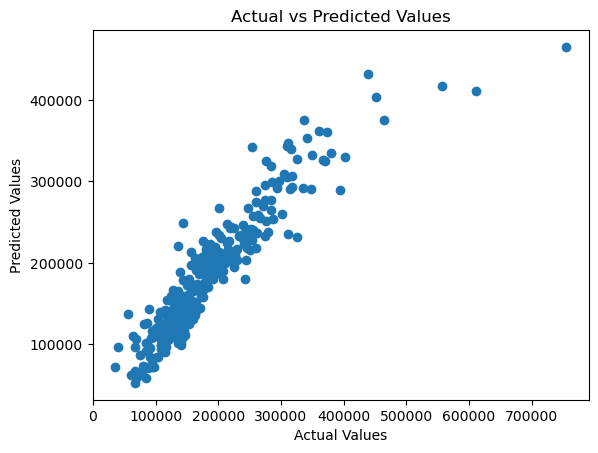

In [789]:
# Create scatter plot with actual and predicted values
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [790]:
predictors = X_train.columns
coef = pd.Series(ridge_two.coef_,predictors).sort_values()

In [791]:
coef.tail(10)

Neighborhood_NridgHt    21084.782861
1stFlrSF                24875.347251
FullBath                26876.742358
Neighborhood_StoneBr    27450.757792
GarageCars              29463.245704
Neighborhood_NoRidge    31544.173935
TotRmsAbvGrd            32645.277944
GrLivArea               34545.285339
2ndFlrSF                34668.051229
OverallQual             44476.250280
dtype: float64

### Lasso Regression

In [792]:
lasso = Lasso()

# folds already defined
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [793]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 100}
-18928.158701978355


In [794]:
alpha = 100
lasso  = Lasso(alpha=alpha)
lasso .fit(X_train, y_train)
lasso.coef_

array([-2.44910666e+04,  2.50188836e+04,  9.13094712e+04,  2.70856979e+04,
        1.22607851e+04,  8.63930673e+03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.66370224e+04,
       -0.00000000e+00,  1.80303612e+05,  2.29093298e+04,  0.00000000e+00,
        2.17036284e+04,  5.55617691e+03, -0.00000000e+00, -1.76102961e+03,
        2.16520523e+04,  1.64367296e+04,  4.55101483e+04,  0.00000000e+00,
        1.56622227e+04, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        1.36988100e+04,  0.00000000e+00, -0.00000000e+00, -3.66073374e+02,
       -0.00000000e+00, -0.00000000e+00,  1.76136079e+03, -0.00000000e+00,
        1.95068093e+03, -0.00000000e+00,  2.06271834e+03, -1.10531682e+03,
        0.00000000e+00,  1.12744776e+04, -1.24068674e+04,  0.00000000e+00,
        1.88857198e+04,  9.94490492e+03,  1.06164782e+04, -0.00000000e+00,
        1.36587470e+04, -3.65406572e+03, -0.00000000e+00,  0.00000000e+00,
        3.81773595e+03,  

In [795]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [796]:
r2_train_losso = r2_score(y_train, y_pred_train)
r2_test_losso = r2_score(y_test, y_pred_test)

In [797]:
print(r2_train_losso)
print(r2_test_losso)

0.8897515232648353
0.8813665508014209


#### Residual Analysis

Text(0.5, 0, 'Errors')

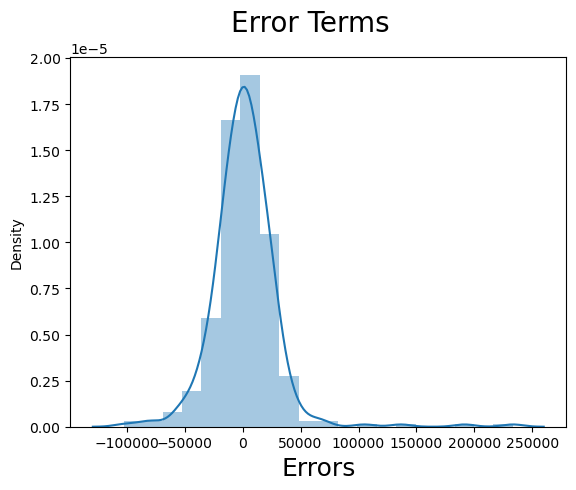

In [798]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred_test), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

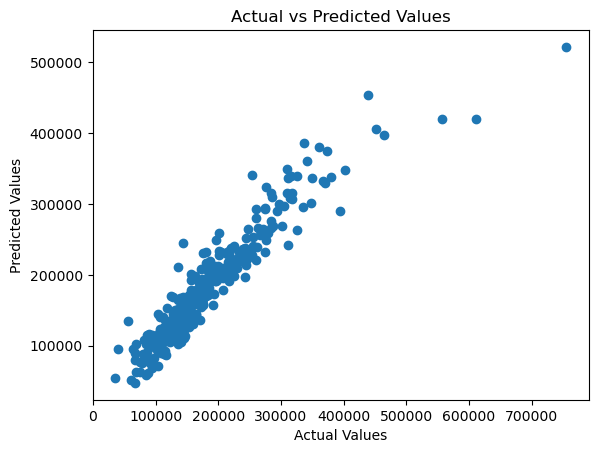

In [799]:
# Create scatter plot with actual and predicted values
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

<Axes: title={'center': 'Modal Coefficients'}>

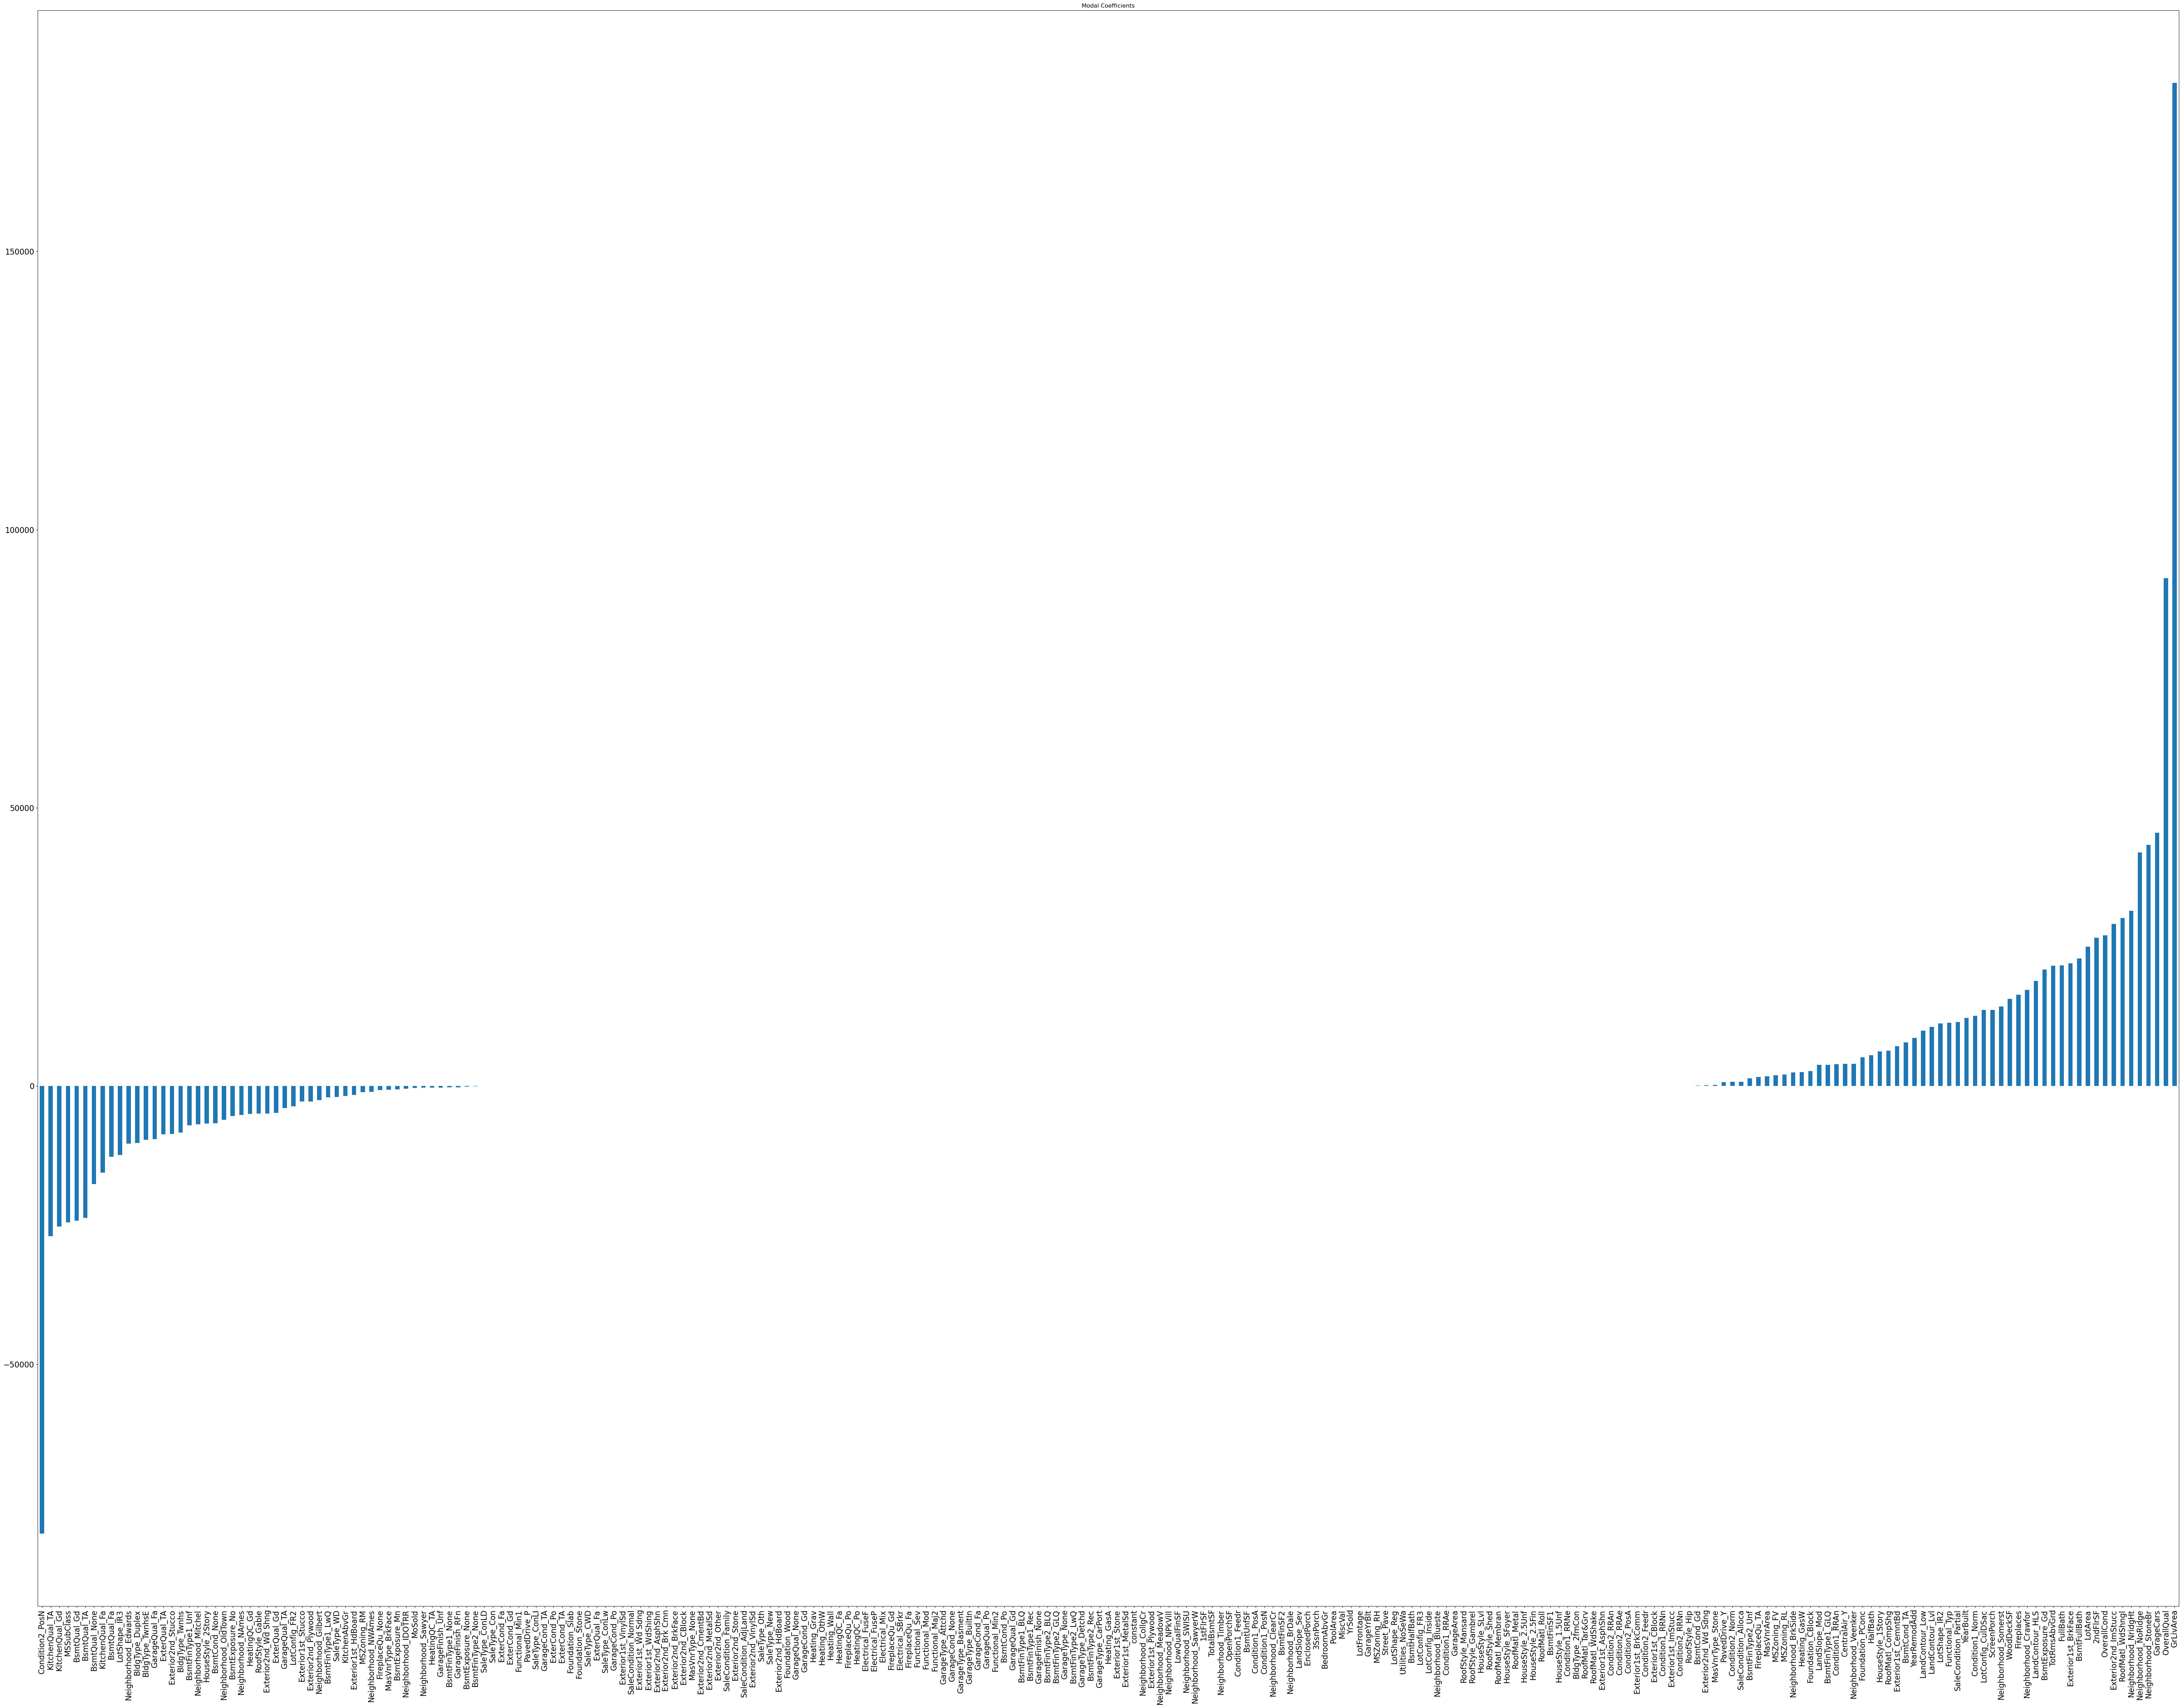

In [800]:
predictors = X_train.columns
coef = pd.Series(lasso.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients', fontsize='16',figsize=(80, 60))

In [801]:
coef.tail(10)

2ndFlrSF                 26637.022354
OverallCond              27085.697896
Exterior2nd_ImStucc      29114.355395
RoofMatl_WdShngl         30181.571931
Neighborhood_NridgHt     31519.519471
Neighborhood_NoRidge     42003.553392
Neighborhood_StoneBr     43344.607933
GarageCars               45510.148328
OverallQual              91309.471247
GrLivArea               180303.612302
dtype: float64

#### Question 1:

In [802]:
alpha = 200
lasso_double  = Lasso(alpha=alpha)
lasso_double.fit(X_train, y_train)
lasso_double.coef_

array([-2.93430351e+04,  0.00000000e+00,  9.99861275e+04,  1.80437301e+04,
        2.61903438e+03,  1.11856357e+04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.76968735e+04,
        0.00000000e+00,  1.63662509e+05,  2.29788657e+04,  0.00000000e+00,
        1.86636283e+04,  4.71147933e+03,  0.00000000e+00, -0.00000000e+00,
        2.59363788e+04,  1.71617133e+04,  4.84234281e+04,  0.00000000e+00,
        1.53902679e+04,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        9.95364923e+03,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -4.73340696e+03,
        0.00000000e+00,  1.16402643e+04, -0.00000000e+00, -0.00000000e+00,
        9.29097537e+03,  0.00000000e+00,  2.93528395e+03, -0.00000000e+00,
        1.31657659e+04, -1.73924310e+02, -0.00000000e+00,  0.00000000e+00,
        2.06927145e+03,  

In [803]:
y_pred_train = lasso_double.predict(X_train)
y_pred_test = lasso_double.predict(X_test)

In [804]:
r2_train_losso_two = r2_score(y_train, y_pred_train)
r2_test_losso_two = r2_score(y_test, y_pred_test)

#### Residual Analysis

Text(0.5, 0, 'Errors')

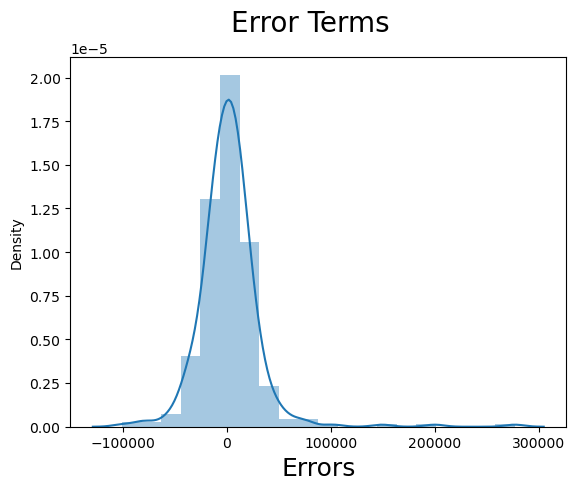

In [805]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred_test), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

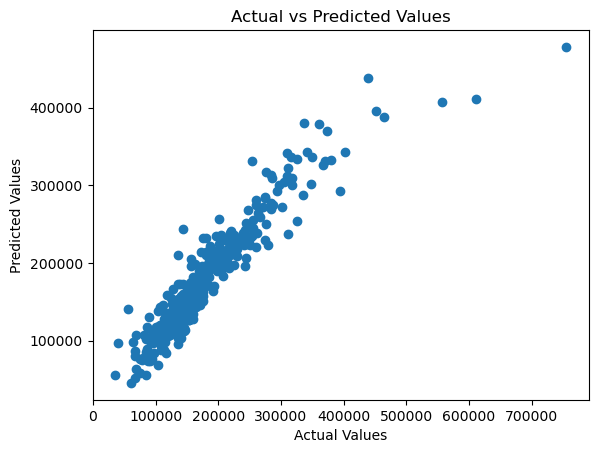

In [806]:
# Create scatter plot with actual and predicted values
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [807]:
predictors = X_train.columns
coef = pd.Series(lasso_double.coef_,predictors).sort_values()

In [808]:
print(r2_train_losso_two)
print(r2_test_losso_two)

0.8726187376814015
0.8687259932942732


In [809]:
coef.tail()

Neighborhood_StoneBr     37729.275747
Neighborhood_NoRidge     40892.086666
GarageCars               48423.428091
OverallQual              99986.127502
GrLivArea               163662.509337
dtype: float64

In [810]:
coef.tail(10)

Exterior1st_BrkFace      19800.089115
BsmtExposure_Gd          21984.698266
BsmtFullBath             22978.865745
TotRmsAbvGrd             25936.378755
Neighborhood_NridgHt     29767.145707
Neighborhood_StoneBr     37729.275747
Neighborhood_NoRidge     40892.086666
GarageCars               48423.428091
OverallQual              99986.127502
GrLivArea               163662.509337
dtype: float64